### Problem 2

An autoencoder is a neural network used for dimensionality reduction; that is, for feature selection and extraction. In denoising autoencoders, a random noise is deliberately added to the input and network is forced to reconstruct the unadulterated input. The decoder function learns to resist small changes in the input. This pretraining result in a robust neural network which is immune to noise in input up to a certain extent. We want to build the model to reconstruct the original signals from the noisy one.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

/Users/GYUNAM/.pyenv/versions/3.4.5/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#load mnist data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:

#shape of input and latent variable

#shape of input
n_input = 28*28

#encoder shape
n_encoder = 128

n_latent = 32

#decoder shape
n_decoder = 128

In [4]:
#define weights and biases

weights = {
    'encoder' : tf.Variable(tf.random_normal([n_input, n_encoder], stddev=0.1)),
    'latent' : tf.Variable(tf.random_normal([n_encoder, n_latent], stddev=0.1)),
    'decoder' : tf.Variable(tf.random_normal([n_latent, n_decoder], stddev=0.1)),
    'reconst' : tf.Variable(tf.random_normal([n_decoder, n_input], stddev=0.1))
    }

biases = {
    'encoder' : tf.Variable(tf.random_normal([n_encoder], stddev=0.1)),
    'latent' : tf.Variable(tf.random_normal([n_latent], stddev=0.1)),
    'decoder' : tf.Variable(tf.random_normal([n_decoder], stddev=0.1)),
    'reconst' : tf.Variable(tf.random_normal([n_input], stddev=0.1))
}

x = tf.placeholder(tf.float32, [None, n_input])
original = tf.placeholder(tf.float32, [None, n_input])

In [5]:
#encoder function
def encoder(x, weights, biases):
    encoder = tf.add(tf.matmul(x, weights['encoder']), biases['encoder'])
    encoder = tf.nn.tanh(encoder)

    latent = tf.add(tf.matmul(encoder, weights['latent']), biases['latent'])

    return latent

In [6]:
def decoder(latent, weights, biases):
    decoder = tf.add(tf.matmul(latent, weights['decoder']), biases['decoder'])
    decoder = tf.nn.tanh(decoder)

    reconst = tf.add(tf.matmul(decoder, weights['reconst']), biases['reconst'])

    return reconst

In [7]:
LR = 0.0001

latent = encoder(x, weights, biases)
reconst = decoder(latent, weights, biases)
loss = tf.square(tf.subtract(original, reconst))
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

In [8]:
n_batch = 50
n_iter = 5500
n_prt = 250

In [9]:
sess = tf.Session()
sess.run(init)

In [10]:
x_train_noisy = cPickle.load(open('./denoising autoencoder data/x_train_noisy.pkl','rb'))
x_train_original = cPickle.load(open('./denoising autoencoder data/original_train_mnist.pkl','rb'))

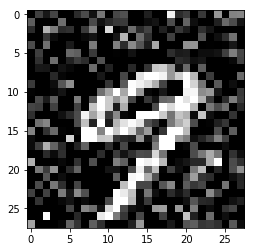

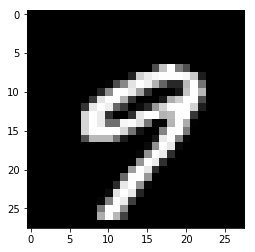

In [32]:
idx = np.random.randint(mnist.train.images.shape[0], size = 1)
plt.imshow(x_train_noisy[idx].reshape(28,28),'gray')
plt.show()
plt.imshow(x_train_original[idx].reshape(28,28),'gray')
plt.show()

In [11]:
for epoch in range(n_iter):
    idx = np.random.randint(mnist.train.images.shape[0], size = n_batch)
    noisy_x = [x_train_noisy[i] for i in idx]
    origin_x = [x_train_original[i] for i in idx]
    sess.run(optm, feed_dict={x: noisy_x, original: origin_x})
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: noisy_x, original: origin_x})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 0.28929412364959717
Iter : 250
Cost : 0.07661877572536469
Iter : 500
Cost : 0.0631159320473671
Iter : 750
Cost : 0.06471838802099228
Iter : 1000
Cost : 0.06399960815906525
Iter : 1250
Cost : 0.05755922943353653
Iter : 1500
Cost : 0.0522172749042511
Iter : 1750
Cost : 0.04577495902776718
Iter : 2000
Cost : 0.047039564698934555
Iter : 2250
Cost : 0.04428476095199585
Iter : 2500
Cost : 0.04183505102992058
Iter : 2750
Cost : 0.04299896955490112
Iter : 3000
Cost : 0.03846859186887741
Iter : 3250
Cost : 0.039206624031066895
Iter : 3500
Cost : 0.037510935217142105
Iter : 3750
Cost : 0.040112752467393875
Iter : 4000
Cost : 0.03453920781612396
Iter : 4250
Cost : 0.03403760865330696
Iter : 4500
Cost : 0.03611651808023453
Iter : 4750
Cost : 0.03345419093966484
Iter : 5000
Cost : 0.03249308094382286
Iter : 5250
Cost : 0.03191938251256943


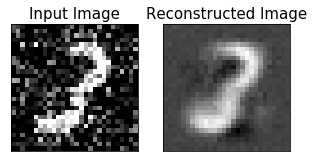

In [12]:
idx = np.random.randint(x_train_noisy.shape[0])
noisy_x = x_train_noisy[idx].reshape((-1,784))
x_reconst = sess.run(reconst, feed_dict = {x : noisy_x})

fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(noisy_x.reshape(28, 28), 'gray')
ax1.set_title('Input Image', fontsize=15)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(x_reconst.reshape(28, 28), 'gray')
ax2.set_title('Reconstructed Image', fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()